# **Loading Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# **Generate random message**

In [3]:
def message_gen(dataset_size):
  m = np.zeros((dataset_size, 11))
  for i in range(dataset_size):
    m[i] = np.array(np.random.randint(0, 2, size=11))
  return m

# **Encoding (15,11) Hamming code**

Define the generator matrix and parity check matrix and encode the message

In [4]:
# encoding function
def encoding(m):
    dataset_size = m.shape[0]
    G = np.array([
      [1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
      [0,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
      [0,0,1,0,0,0,0,0,0,0,0,1,0,1,1],
      [0,0,0,1,0,0,0,0,0,0,0,1,1,0,1],
      [0,0,0,0,1,0,0,0,0,0,0,1,1,1,0],
      [0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
      [0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
      [0,0,0,0,0,0,0,1,0,0,0,0,1,1,0],
      [0,0,0,0,0,0,0,0,1,0,0,1,0,1,0],
      [0,0,0,0,0,0,0,0,0,1,0,1,0,0,1],
      [0,0,0,0,0,0,0,0,0,0,1,1,1,0,0]
    ])
  
    c = np.dot(m, G)
    c = c % 2

    m_modified = np.zeros(dataset_size)
    for i in range(dataset_size):
      m_modified[i] += m[i][0]*1024 + m[i][1]*512 + m[i][2]*256 + m[i][3]*128 + m[i][4]*64 + m[i][5]*32 + m[i][6]*16 + m[i][7]*8 + m[i][8]*4 + m[i][9]*2 + m[i][10]

    m_modified = np.asarray(m_modified, dtype = 'int')
    return c, m_modified
    


# **Modulation (BPSK)**

In [5]:
def modulation(c,SNR):
  # type your own code
  # assign the signal power based on the given SNR
  # implement the BPSK modulation
  N0 = 1
  P = (10 ** (SNR/10) )* N0
  x = np.zeros(c.shape)
  for i, code in enumerate(c):
    x[i] = np.sqrt(P)*(2*code-1)
  return x

# **AWGN channel**

In [6]:
def AWGN_Channel(x):
  # assign the normalized noise
  # return the receive signal y by transmitted signal x plus the noise n
  N0 = 1
  sigma = np.sqrt(N0/2)
  y = np.zeros(x.shape)
  for i in range(y.shape[0]):
    y[i] = x[i] + np.random.normal(0, sigma, x[i].shape)
  return y

# **Splitting data into training and testing**

In [7]:
def splitting_data(y,m,rate,file_size):
  train_size = round(file_size*rate)
  test_size = file_size - train_size
  train_y = y[0:train_size,:]
  train_m = m[0:train_size]
  test_y = y[train_size:file_size,:]
  test_m = m[train_size:file_size]
  return train_y, train_m, test_y, test_m, train_size, test_size

# Compiling the model

In [42]:
def model_compile(SNR):
    learning_rate = 0.001/(SNR**1.8+1)
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(2048, activation='sigmoid'))

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# **Calculate BLER**

In [9]:
def caculate_error(m_hat,m_class):
  BLER = np.mean(np.not_equal(m_hat, m_class))
  return BLER

# Main Function

Epoch 1/25
1750/1750 [==============================] - 40s 22ms/step - loss: 0.0089 - accuracy: 0.0273 - val_loss: 0.0031 - val_accuracy: 0.1208
Epoch 2/25
1750/1750 [==============================] - 39s 22ms/step - loss: 0.0019 - accuracy: 0.4095 - val_loss: 0.0013 - val_accuracy: 0.5824
Epoch 3/25
1750/1750 [==============================] - 40s 23ms/step - loss: 0.0011 - accuracy: 0.6620 - val_loss: 0.0010 - val_accuracy: 0.6539
Epoch 4/25
1750/1750 [==============================] - 38s 22ms/step - loss: 9.0111e-04 - accuracy: 0.7142 - val_loss: 9.9303e-04 - val_accuracy: 0.6787
Epoch 5/25
1750/1750 [==============================] - 40s 23ms/step - loss: 8.2417e-04 - accuracy: 0.7412 - val_loss: 9.9371e-04 - val_accuracy: 0.6759
Epoch 6/25
1750/1750 [==============================] - 40s 23ms/step - loss: 7.6545e-04 - accuracy: 0.7614 - val_loss: 9.6053e-04 - val_accuracy: 0.6914
Epoch 7/25
1750/1750 [==============================] - 45s 26ms/step - loss: 7.1216e-04 - accuracy:

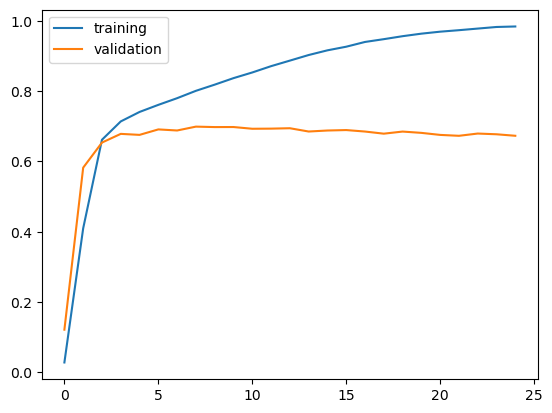

938/938 [==============================] - 3s 3ms/step
BLER:  0.3293333333333333
0 / 6
Epoch 1/50
1750/1750 [==============================] - 47s 27ms/step - loss: 0.0133 - accuracy: 0.0062 - val_loss: 0.0041 - val_accuracy: 0.0309
Epoch 2/50
1750/1750 [==============================] - 45s 26ms/step - loss: 0.0032 - accuracy: 0.1680 - val_loss: 0.0022 - val_accuracy: 0.4210
Epoch 3/50
1750/1750 [==============================] - 41s 24ms/step - loss: 0.0013 - accuracy: 0.6723 - val_loss: 9.0275e-04 - val_accuracy: 0.7601
Epoch 4/50
1750/1750 [==============================] - 39s 22ms/step - loss: 6.8444e-04 - accuracy: 0.8249 - val_loss: 7.0624e-04 - val_accuracy: 0.8006
Epoch 5/50
1750/1750 [==============================] - 39s 22ms/step - loss: 5.5913e-04 - accuracy: 0.8552 - val_loss: 6.6568e-04 - val_accuracy: 0.8085
Epoch 6/50
1750/1750 [==============================] - 39s 22ms/step - loss: 5.0053e-04 - accuracy: 0.8735 - val_loss: 6.6989e-04 - val_accuracy: 0.8137
Epoch 7/5

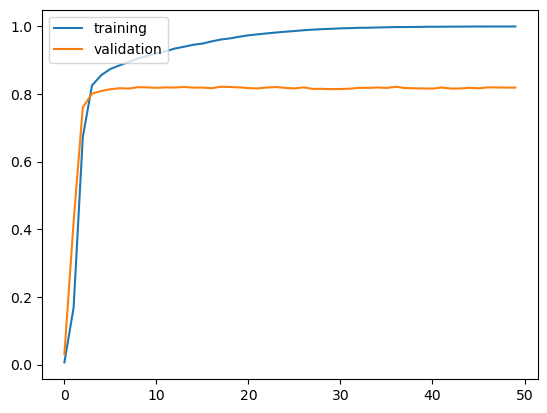

938/938 [==============================] - 3s 3ms/step
BLER:  0.17416666666666666
1 / 6
Epoch 1/50
1750/1750 [==============================] - 45s 26ms/step - loss: 0.0220 - accuracy: 0.0022 - val_loss: 0.0043 - val_accuracy: 0.0041
Epoch 2/50
1750/1750 [==============================] - 44s 25ms/step - loss: 0.0042 - accuracy: 0.0229 - val_loss: 0.0039 - val_accuracy: 0.0581
Epoch 3/50
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0034 - accuracy: 0.1829 - val_loss: 0.0028 - val_accuracy: 0.3504
Epoch 4/50
1750/1750 [==============================] - 41s 23ms/step - loss: 0.0019 - accuracy: 0.6387 - val_loss: 0.0011 - val_accuracy: 0.8078
Epoch 5/50
1750/1750 [==============================] - 40s 23ms/step - loss: 6.9225e-04 - accuracy: 0.9030 - val_loss: 5.2583e-04 - val_accuracy: 0.9032
Epoch 6/50
1750/1750 [==============================] - 40s 23ms/step - loss: 3.7942e-04 - accuracy: 0.9380 - val_loss: 4.0460e-04 - val_accuracy: 0.9148
Epoch 7/50
1750/1750

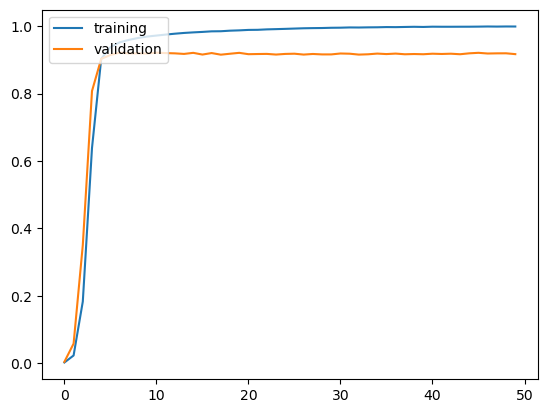

938/938 [==============================] - 3s 3ms/step
BLER:  0.07946666666666667
2 / 6
Epoch 1/50
1750/1750 [==============================] - 50s 28ms/step - loss: 0.0340 - accuracy: 9.4643e-04 - val_loss: 0.0044 - val_accuracy: 0.0022
Epoch 2/50
1750/1750 [==============================] - 46s 26ms/step - loss: 0.0043 - accuracy: 0.0097 - val_loss: 0.0042 - val_accuracy: 0.0166
Epoch 3/50
1750/1750 [==============================] - 41s 24ms/step - loss: 0.0040 - accuracy: 0.0583 - val_loss: 0.0038 - val_accuracy: 0.1053
Epoch 4/50
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0034 - accuracy: 0.2551 - val_loss: 0.0029 - val_accuracy: 0.4241
Epoch 5/50
1750/1750 [==============================] - 41s 23ms/step - loss: 0.0021 - accuracy: 0.6422 - val_loss: 0.0015 - val_accuracy: 0.7943
Epoch 6/50
1750/1750 [==============================] - 40s 23ms/step - loss: 9.6313e-04 - accuracy: 0.9160 - val_loss: 6.0874e-04 - val_accuracy: 0.9530
Epoch 7/50
1750/1750 [==

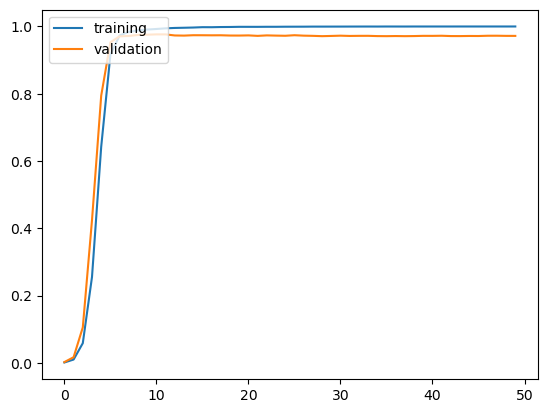

938/938 [==============================] - 3s 3ms/step
BLER:  0.028233333333333333
3 / 6
Epoch 1/30
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0490 - accuracy: 5.3571e-04 - val_loss: 0.0044 - val_accuracy: 0.0021
Epoch 2/30
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0043 - accuracy: 0.0052 - val_loss: 0.0043 - val_accuracy: 0.0131
Epoch 3/30
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0042 - accuracy: 0.0259 - val_loss: 0.0041 - val_accuracy: 0.0474
Epoch 4/30
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0039 - accuracy: 0.1106 - val_loss: 0.0036 - val_accuracy: 0.1965
Epoch 5/30
1750/1750 [==============================] - 42s 24ms/step - loss: 0.0032 - accuracy: 0.3475 - val_loss: 0.0028 - val_accuracy: 0.4804
Epoch 6/30
1750/1750 [==============================] - 45s 26ms/step - loss: 0.0022 - accuracy: 0.6753 - val_loss: 0.0018 - val_accuracy: 0.7917
Epoch 7/30
1750/1750 [=========

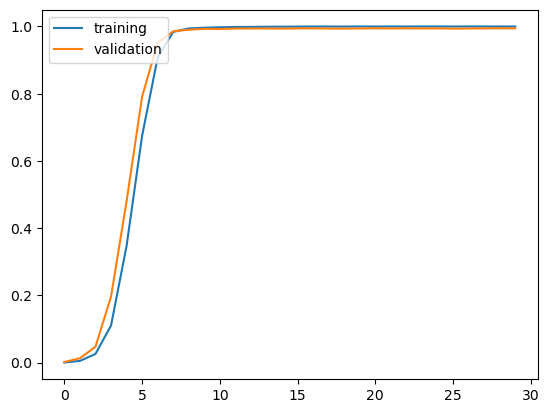

938/938 [==============================] - 3s 3ms/step
BLER:  0.006033333333333333
4 / 6
Epoch 1/30
1750/1750 [==============================] - 51s 29ms/step - loss: 0.0639 - accuracy: 6.4286e-04 - val_loss: 0.0045 - val_accuracy: 7.1429e-04
Epoch 2/30
1750/1750 [==============================] - 51s 29ms/step - loss: 0.0044 - accuracy: 0.0016 - val_loss: 0.0043 - val_accuracy: 0.0039
Epoch 3/30
1750/1750 [==============================] - 50s 29ms/step - loss: 0.0042 - accuracy: 0.0120 - val_loss: 0.0042 - val_accuracy: 0.0201
Epoch 4/30
1750/1750 [==============================] - 51s 29ms/step - loss: 0.0041 - accuracy: 0.0564 - val_loss: 0.0039 - val_accuracy: 0.0883
Epoch 5/30
1750/1750 [==============================] - 50s 29ms/step - loss: 0.0037 - accuracy: 0.1860 - val_loss: 0.0035 - val_accuracy: 0.2786
Epoch 6/30
1750/1750 [==============================] - 51s 29ms/step - loss: 0.0031 - accuracy: 0.4301 - val_loss: 0.0027 - val_accuracy: 0.5479
Epoch 7/30
1750/1750 [=====

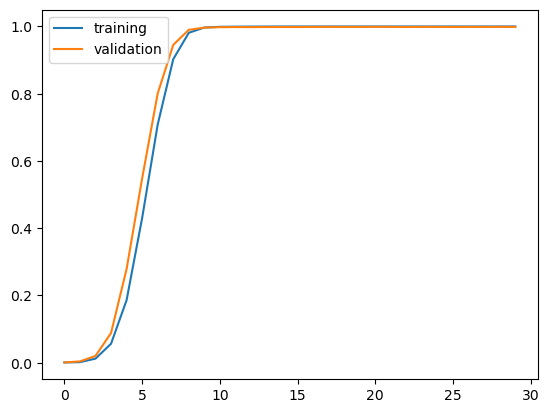

938/938 [==============================] - 4s 4ms/step
BLER:  0.001
5 / 6
Epoch 1/30
5250/5250 [==============================] - 135s 26ms/step - loss: 0.0298 - accuracy: 0.0030 - val_loss: 0.0042 - val_accuracy: 0.0125
Epoch 2/30
5250/5250 [==============================] - 133s 25ms/step - loss: 0.0038 - accuracy: 0.1577 - val_loss: 0.0032 - val_accuracy: 0.4621
Epoch 3/30
5250/5250 [==============================] - 132s 25ms/step - loss: 0.0022 - accuracy: 0.7997 - val_loss: 0.0012 - val_accuracy: 0.9802
Epoch 4/30
5250/5250 [==============================] - 140s 27ms/step - loss: 5.5734e-04 - accuracy: 0.9967 - val_loss: 1.8889e-04 - val_accuracy: 0.9996
Epoch 5/30
5250/5250 [==============================] - 151s 29ms/step - loss: 9.4900e-05 - accuracy: 0.9999 - val_loss: 5.1646e-05 - val_accuracy: 0.9998
Epoch 6/30
5250/5250 [==============================] - 137s 26ms/step - loss: 3.3078e-05 - accuracy: 0.9999 - val_loss: 2.5733e-05 - val_accuracy: 0.9999
Epoch 7/30
5250/5250

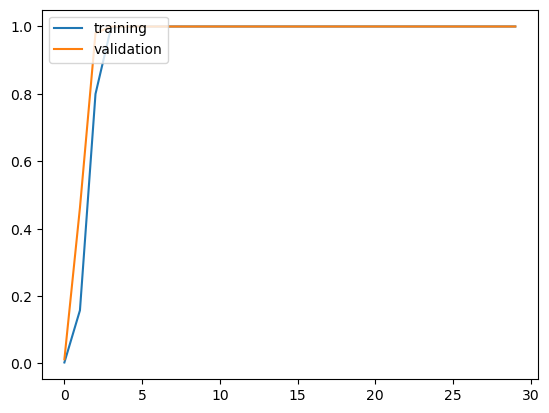

2813/2813 [==============================] - 9s 3ms/step
BLER:  3.3333333333333335e-05
6 / 6
Block Error Rate: [3.29333333e-01 1.74166667e-01 7.94666667e-02 2.82333333e-02
 6.03333333e-03 1.00000000e-03 3.33333333e-05]


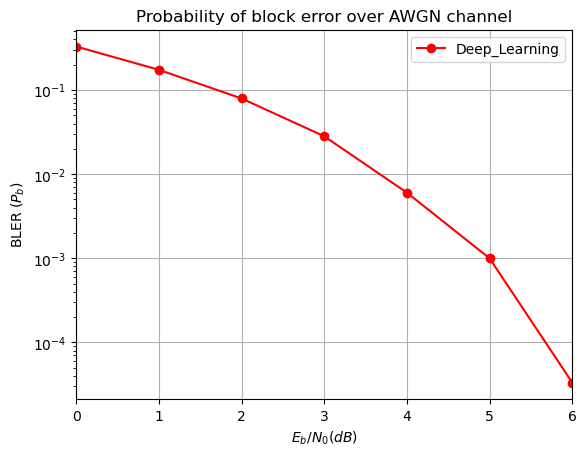

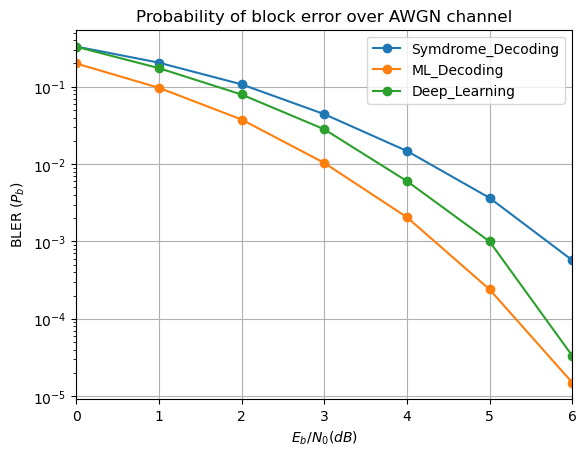

Wall time: 4h 1min 1s


In [44]:
%%time
SNR_start = 0
SNR_end = 6
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BLER = np.zeros(length_SNR)
rate = 0.7 # training data rate
datasetsize4SNR = np.array([1e5, 1e5, 1e5, 1e5, 1e5, 1e5, 3e5, 8e5, 8e5],dtype=int)
for i in range(length_SNR):

  #------------------------------------#
  # transmitter part
  #------------------------------------#
  # generate message
  message = message_gen(datasetsize4SNR[i])
  # generate codeword
  c, m = encoding(message)
  # BPSK modulation
  x = modulation(c, SNR[i])
  # go through AWGN channel
  y = AWGN_Channel(x)
  
  #------------------------------------#
  # receiver part
  #------------------------------------#
  # decoding by deep learning
  # split data
  [train_y,train_m,test_y,test_m,train_size,test_size] = splitting_data(y,m,rate,datasetsize4SNR[i])
  
  # define model
  unique_category_count = 2048
  train_m_OneHot=tf.one_hot(train_m, unique_category_count)
  #test_m_OneHot=tf.one_hot(test_m, unique_category_count)

  model = model_compile(SNR[i])
  
  if i >= 4:
    num_epochs = 30
  elif i >= 1:
    num_epochs = 50
  else:
    num_epochs = 25
    
  # training and fitting model
  history = model.fit(train_y, train_m_OneHot, epochs=num_epochs, validation_split=0.2)
  # predict by the model
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['training', 'validation'], loc = 'upper left')
  plt.show()

  pred = model.predict(test_y)
  pred_m = np.argmax(pred, axis=1)

  # calculate error
  BLER[i] = caculate_error(pred_m, test_m)
  # predict model
  
  # calculate BLER
  
  #BLER[i] = err/test_size
  print("BLER: ",BLER[i])
  print(i,"/",len(BLER)-1)
#Reuse the results of last time
BLER_SymdromeDecoding = [0.33146, 0.20494, 0.10756, 0.04429, 0.0148, 0.00366, 0.0005725]
BLER_ML = [1.9999e-01, 9.7070e-02, 3.7740e-02, 1.0370e-02, 2.0600e-03, 2.4000e-04, 1.5000e-05]
#Plot BLER
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure(1)
plt.semilogy(EbN0dBs,BLER,color='r',marker='o',linestyle='-',label='Deep_Learning')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BLER ($P_b$)')
plt.title('Probability of block error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
print("Block Error Rate:", BLER)
fig2 = plt.figure(2)
plt.semilogy(EbN0dBs,BLER_SymdromeDecoding[SNR_start:SNR_end+1],marker='o',linestyle='-',label='Symdrome_Decoding')
# plt.semilogy(EbN0dBs,BLER_SVM[SNR_start:SNR_end+1],marker='o',linestyle='-',label='SVM')
plt.semilogy(EbN0dBs,BLER_ML[SNR_start:SNR_end+1],marker='o',linestyle='-',label='ML_Decoding')
plt.semilogy(EbN0dBs,BLER,marker='o',linestyle='-',label='Deep_Learning')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BLER ($P_b$)')
plt.title('Probability of block error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()